In [ ]:
file_path = r"D:\주성\documents\2025\Mg comma\clinical features.xlsx"

features = pd.read_excel(file_path, sheet_name='Table1')

In [51]:
df['CIVAD Medications'].str.contains('Pr').sum()

3

In [57]:
table2 = pd.read_excel(file_path, sheet_name='Table2')

In [58]:
table2

,Patient No.,Mg Protocol Type,Mg Starting Date,Mg Infusion Day,Loading Mg,Maintenance Mg
0,1,2,10,4,4.0,2.000000
1,2,2,61,9,4.0,2.000000
2,3,1,2,1,4.0,0.666667
3,4,1,8,0,4.0,2.000000
4,5,1,1,1,4.0,0.666667
5,6,1,2,1,4.0,0.666667
6,7,2,34,2,3.5,2.000000
7,8,2,17,5,2.0,2.000000
8,9,1,1,1,4.0,0.666667
9,10,1,1,1,4.0,0.666667


In [65]:
prot1 = table2.loc[table2["Mg Protocol Type"]==1].iloc[:, 2:]
prot2 = table2.loc[table2["Mg Protocol Type"]==2].iloc[:, 2:]

In [69]:
import scipy.stats as stats

In [78]:
result = {}
for column in prot1.columns:
    stat, p = stats.mannwhitneyu(prot1[column], prot2[column])
    result[column] = {
        'statistics': stat,
        'p-value': p
    }

In [87]:
table2_1 = pd.DataFrame(result).T

In [88]:
table2_1

,statistics,p-value
Mg Starting Date,3.0,0.001296
Mg Infusion Day,6.5,0.000372
Loading Mg,56.0,0.032581
Maintenance Mg,3.0,0.000124


In [86]:
A = []
B = []
for column in prot1.columns:
    A.append(prot1[column].median())
    B.append(prot2[column].median())
print(A, B)

[np.float64(2.0), np.float64(1.0), np.float64(4.0), np.float64(0.6666666666666666)] [np.float64(25.0), np.float64(4.5), np.float64(4.0), np.float64(2.0)]


In [89]:
table2_1["A (median)"] = A
table2_1["B (median)"] = B

In [90]:
table2_1

,statistics,p-value,A (median),B (median)
Mg Starting Date,3.0,0.001296,2.000000,25.0
Mg Infusion Day,6.5,0.000372,1.000000,4.5
Loading Mg,56.0,0.032581,4.000000,4.0
Maintenance Mg,3.0,0.000124,0.666667,2.0


In [92]:
table2_1 = table2_1[['A (median)', 'B (median)', 'statistics', 'p-value']]

In [94]:
table2_1

,A (median),B (median),statistics,p-value
Mg Starting Date,2.000000,25.0,3.0,0.001296
Mg Infusion Day,1.000000,4.5,6.5,0.000372
Loading Mg,4.000000,4.0,56.0,0.032581
Maintenance Mg,0.666667,2.0,3.0,0.000124


In [2]:
import pandas as pd

In [16]:
df = pd.read_excel(r"C:\Users\user\OneDrive - 아주대학교\바탕 화면\2024\뇌과학교실 특임연구원\Mg Coma\GitHub\Mg_infusion_coma\Mg_infusion_data.xlsx", sheet_name='gamma')

In [18]:
df = df.loc[~df['name'].str.contains('2')]

In [19]:
df = df.sort_values(by='name', ascending=True).reset_index(drop=True)

In [20]:
df

,name,band,id,mean_pre_infusion,mean_post_infusion,ks_statistics,ks_p_value_real,ks_p_value,t_statistics,t_p_value_real,t_p_value,effect_size
0,고정실,delta,NaN,1.703294e-08,3.241658e-09,0.5,0,NaN,2026.308554,0.000000e+00,NaN,3.481290
1,고정실,theta,NaN,5.616056e-09,9.920564e-10,0.5,0,NaN,1735.526863,0.000000e+00,NaN,3.039352
2,고정실,alpha,NaN,9.354715e-10,1.989846e-10,0.5,0,NaN,1395.359653,0.000000e+00,NaN,2.447981
3,고정실,beta,NaN,1.141392e-10,6.668991e-11,0.5,0,NaN,466.938620,0.000000e+00,NaN,0.796543
4,고정실,gamma,NaN,1.616524e-11,2.009946e-11,0.5,0,NaN,-97.545901,0.000000e+00,NaN,-0.164123
...,...,...,...,...,...,...,...,...,...,...,...,...
95,조진욱,delta,NaN,1.463215e-08,2.716271e-09,0.5,0,NaN,53.196462,0.000000e+00,NaN,0.099653
96,조진욱,theta,NaN,2.460651e-09,7.497018e-10,0.5,0,NaN,29.848429,1.303914e-195,NaN,0.055923
97,조진욱,alpha,NaN,1.402035e-09,5.321387e-10,0.5,0,NaN,17.223728,1.832443e-66,NaN,0.032269
98,조진욱,beta,NaN,3.255450e-10,9.888629e-11,0.5,0,NaN,17.366566,1.538672e-67,NaN,0.032538


In [22]:
df2 = df[['name', 'band', 'mean_pre_infusion', 'mean_post_infusion', 'effect_size']]

In [28]:
df2['delta'] = df2['mean_pre_infusion'] - df2['mean_post_infusion']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22928\4166398941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['delta'] = df2['mean_pre_infusion'] - df2['mean_post_infusion']


In [31]:
(df2['delta'] >0).sum()

58

In [40]:
((df2['effect_size'].abs() >= 0.3) & (df2['effect_size']<=0.8)).sum()

26

In [43]:
df3 = df2.iloc[:, :-2]

In [52]:
df3

,name,band,mean_pre_infusion,mean_post_infusion
0,고정실,delta,1.703294e-08,3.241658e-09
1,고정실,theta,5.616056e-09,9.920564e-10
2,고정실,alpha,9.354715e-10,1.989846e-10
3,고정실,beta,1.141392e-10,6.668991e-11
4,고정실,gamma,1.616524e-11,2.009946e-11
...,...,...,...,...
95,조진욱,delta,1.463215e-08,2.716271e-09
96,조진욱,theta,2.460651e-09,7.497018e-10
97,조진욱,alpha,1.402035e-09,5.321387e-10
98,조진욱,beta,3.255450e-10,9.888629e-11


In [48]:
freq_range = {'delta':4,
              'theta':5,
              'alpha':6,
              'beta':18,
              'gamma':61}

In [50]:
def power_calc (df):
    band = df['band']
    df['sum_pre_infusion'] = df['mean_pre_infusion']*freq_range[band]
    df['sum_post_infusion'] = df['mean_post_infusion']*freq_range[band]
    return df
    

In [54]:
df3 = df3.apply(power_calc, axis=1)

In [64]:
df3.head()

,name,band,mean_pre_infusion,mean_post_infusion,sum_pre_infusion,sum_post_infusion
0,고정실,delta,1.703294e-08,3.241658e-09,6.813176e-08,1.296663e-08
1,고정실,theta,5.616056e-09,9.920564e-10,2.808028e-08,4.960282e-09
2,고정실,alpha,9.354715e-10,1.989846e-10,5.612829e-09,1.193908e-09
3,고정실,beta,1.141392e-10,6.668991e-11,2.054506e-09,1.200418e-09
4,고정실,gamma,1.616524e-11,2.009946e-11,9.860798e-10,1.226067e-09


In [69]:
df4.loc['고정실', 'sum_pre_infusion']

1.0486545414741164e-07

In [73]:
name = '고정실'
df4.loc[name, 'sum_pre_infusion']

1.0486545414741164e-07

In [61]:
df4 = df3[['name','sum_pre_infusion', 'sum_post_infusion']].groupby('name').sum()

In [110]:
def relative_calc(df):
    name = df['name']
    pre = df4.loc[name, 'sum_pre_infusion']
    post = df4.loc[name, 'sum_post_infusion']
    df['relative_pre_infusion'] = df['sum_pre_infusion'] / pre
    df['relative_post_infusion'] = df['sum_post_infusion'] / pre
    return df

In [111]:
df5 = df3.apply(relative_calc, axis=1)

In [75]:
import scipy.stats as stats

In [90]:
for column in df3.iloc[:, 2:].columns:
    s, p = stats.shapiro(df3[column])
    print(column, p)

mean_pre_infusion 3.478966851227448e-18
mean_post_infusion 5.2529366544268485e-21
sum_pre_infusion 3.8468974055920727e-17
sum_post_infusion 9.989741679122603e-21
relative_pre_infusion 5.3819976162772724e-11
relative_post_infusion 1.1700660633433227e-10


In [95]:
df3.iloc[:, [0,1,2,3,6,7]]

,name,band,mean_pre_infusion,mean_post_infusion,relative_pre_infusion,relative_post_infusion
0,고정실,delta,1.703294e-08,3.241658e-09,0.649706,0.601775
1,고정실,theta,5.616056e-09,9.920564e-10,0.267774,0.230204
2,고정실,alpha,9.354715e-10,1.989846e-10,0.053524,0.055409
3,고정실,beta,1.141392e-10,6.668991e-11,0.019592,0.055711
4,고정실,gamma,1.616524e-11,2.009946e-11,0.009403,0.056901
...,...,...,...,...,...,...
95,조진욱,delta,1.463215e-08,2.716271e-09,0.661928,0.545192
96,조진욱,theta,2.460651e-09,7.497018e-10,0.139143,0.188094
97,조진욱,alpha,1.402035e-09,5.321387e-10,0.095138,0.160211
98,조진욱,beta,3.255450e-10,9.888629e-11,0.066271,0.089315


In [91]:
results = pd.DataFrame(columns=[('Absolute Power', 'Pre-Infusion'), ('Absolute Power', 'Post-Infusion'), ('Absolute Power', 'Statistics'), ('Absolute Power', 'p-values'), ('Relative Power', 'Pre-Infusion'), ('Relative Power', 'Post-Infusion'), ('Relative Power', 'Statistics'), ('Relative Power', 'p-values') ])

In [92]:
results

,"(Absolute Power, Pre-Infusion)","(Absolute Power, Post-Infusion)","(Absolute Power, Statistics)","(Absolute Power, p-values)","(Relative Power, Pre-Infusion)","(Relative Power, Post-Infusion)","(Relative Power, Statistics)","(Relative Power, p-values)"


In [85]:
t, p = stats.shapiro (df3['mean_pre_infusion'], df3['mean_post_infusion'])
print(t, p)

TypeError: shapiro() takes 1 positional argument but 2 were given

In [77]:
df3['mean_pre_infusion'].mean()

2.7803715198403952e-09

In [78]:
df3['mean_post_infusion'].mean()

3.755620360414941e-09

In [82]:
t, p = stats.ttest_rel(df3['relative_pre_infusion'], df3['relative_post_infusion'])
print(t, p)

2.6051260684023154e-16 0.9999999999999998


In [84]:
t, p = stats.ttest_rel(df3.loc[df3['band']=='theta']['relative_pre_infusion'], df3.loc[df3['band']=='theta']['relative_post_infusion'])
print(t, p)

0.1691682672255725 0.8674523327442535


In [96]:
def perform_complete_wilcoxon_analysis(data):
    results = []
    
    # 1. 전체 데이터 분석
    abs_wilcoxon_all = stats.wilcoxon(
        data['mean_pre_infusion'],
        data['mean_post_infusion']
    )
    
    rel_wilcoxon_all = stats.wilcoxon(
        data['relative_pre_infusion'],
        data['relative_post_infusion']
    )
    
    # 전체 결과 저장
    results.append({
        'band': 'ALL',
        'absolute_power_pre': data['mean_pre_infusion'].median(),
        'absolute_power_post': data['mean_post_infusion'].median(),
        'absolute_power_stat': abs_wilcoxon_all.statistic,
        'absolute_power_p': abs_wilcoxon_all.pvalue,
        'relative_power_pre': data['relative_pre_infusion'].median(),
        'relative_power_post': data['relative_post_infusion'].median(),
        'relative_power_stat': rel_wilcoxon_all.statistic,
        'relative_power_p': rel_wilcoxon_all.pvalue
    })
    
    # 2. 밴드별 분석
    bands = data['band'].unique()
    
    for band in bands:
        band_data = data[data['band'] == band]
        
        # Absolute power 윌콕슨 검정
        abs_wilcoxon = stats.wilcoxon(
            band_data['mean_pre_infusion'],
            band_data['mean_post_infusion']
        )
        
        # Relative power 윌콕슨 검정
        rel_wilcoxon = stats.wilcoxon(
            band_data['relative_pre_infusion'],
            band_data['relative_post_infusion']
        )
        
        # 결과 저장
        results.append({
            'band': band,
            'absolute_power_pre': band_data['mean_pre_infusion'].median(),
            'absolute_power_post': band_data['mean_post_infusion'].median(),
            'absolute_power_stat': abs_wilcoxon.statistic,
            'absolute_power_p': abs_wilcoxon.pvalue,
            'relative_power_pre': band_data['relative_pre_infusion'].median(),
            'relative_power_post': band_data['relative_post_infusion'].median(),
            'relative_power_stat': rel_wilcoxon.statistic,
            'relative_power_p': rel_wilcoxon.pvalue
        })
    
    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)
    
    # band 칼럼을 기준으로 정렬 ('ALL'이 맨 위로 오도록)
    results_df = results_df.sort_values('band').reset_index(drop=True)
    
    return results_df


In [109]:
perform_complete_wilcoxon_analysis(df3.iloc[:, [0,1,2,3,6,7]])

,band,absolute_power_pre,absolute_power_post,absolute_power_stat,absolute_power_p,relative_power_pre,relative_power_post,relative_power_stat,relative_power_p
0,ALL,5.994×10^-10,3.545×10^-10,2.011×10^3,p = 0.077,9.662×10^-2,1.049×10^-1,2.415×10^3,p = 0.705
1,alpha,6.802×10^-10,3.327×10^-10,1.000×10^2,p = 0.869,8.210×10^-2,9.267×10^-2,7.200×10^1,p = 0.231
2,beta,1.002×10^-10,7.753×10^-11,7.400×10^1,p = 0.261,6.521×10^-2,5.896×10^-2,8.000×10^1,p = 0.368
3,delta,6.001×10^-9,4.645×10^-9,7.000×10^1,p = 0.202,6.072×10^-1,5.903×10^-1,8.700×10^1,p = 0.522
4,gamma,1.815×10^-11,1.302×10^-11,8.800×10^1,p = 0.546,3.324×10^-2,2.773×10^-2,8.900×10^1,p = 0.571
5,theta,1.037×10^-9,8.543×10^-10,8.200×10^1,p = 0.409,2.033×10^-1,1.968×10^-1,1.030×10^2,p = 0.956


In [98]:
df3.head()

,name,band,mean_pre_infusion,mean_post_infusion,sum_pre_infusion,sum_post_infusion,relative_pre_infusion,relative_post_infusion
0,고정실,delta,1.703294e-08,3.241658e-09,6.813176e-08,1.296663e-08,0.649706,0.601775
1,고정실,theta,5.616056e-09,9.920564e-10,2.808028e-08,4.960282e-09,0.267774,0.230204
2,고정실,alpha,9.354715e-10,1.989846e-10,5.612829e-09,1.193908e-09,0.053524,0.055409
3,고정실,beta,1.141392e-10,6.668991e-11,2.054506e-09,1.200418e-09,0.019592,0.055711
4,고정실,gamma,1.616524e-11,2.009946e-11,9.860798e-10,1.226067e-09,0.009403,0.056901


In [102]:
for band in df3['band'].unique():
    num = df3.loc[(df3['mean_pre_infusion'] >= df3['mean_post_infusion'])&(df3['band']==band)].shape[0]
    print(band, num)

delta 14
theta 13
alpha 10
beta 14
gamma 7


In [108]:
import pandas as pd
import numpy as np
from scipy import stats

def format_scientific_notation(x):
    """과학적 표기법을 의학 논문 형식으로 변환"""
    return f"{x:.3e}".replace('e-0', '×10^-').replace('e-', '×10^-').replace('e+0', '×10^').replace('e+', '×10^')

def format_p_value(p):
    """p값을 의학 논문 형식으로 변환"""
    if p < 0.001:
        return "p < 0.001"
    else:
        return f"p = {p:.3f}"

def perform_complete_wilcoxon_analysis(data):
    results = []
    
    # 1. 전체 데이터 분석
    abs_wilcoxon_all = stats.wilcoxon(
        data['mean_pre_infusion'],
        data['mean_post_infusion']
    )
    
    rel_wilcoxon_all = stats.wilcoxon(
        data['relative_pre_infusion'],
        data['relative_post_infusion']
    )
    
    # 전체 결과 저장
    results.append({
        'band': 'ALL',
        'absolute_power_pre': data['mean_pre_infusion'].median(),
        'absolute_power_post': data['mean_post_infusion'].median(),
        'absolute_power_stat': abs_wilcoxon_all.statistic,
        'absolute_power_p': abs_wilcoxon_all.pvalue,
        'relative_power_pre': data['relative_pre_infusion'].median(),
        'relative_power_post': data['relative_post_infusion'].median(),
        'relative_power_stat': rel_wilcoxon_all.statistic,
        'relative_power_p': rel_wilcoxon_all.pvalue
    })
    
    # 2. 밴드별 분석
    bands = data['band'].unique()
    
    for band in bands:
        band_data = data[data['band'] == band]
        
        abs_wilcoxon = stats.wilcoxon(
            band_data['mean_pre_infusion'],
            band_data['mean_post_infusion']
        )
        
        rel_wilcoxon = stats.wilcoxon(
            band_data['relative_pre_infusion'],
            band_data['relative_post_infusion']
        )
        
        results.append({
            'band': band,
            'absolute_power_pre': band_data['mean_pre_infusion'].median(),
            'absolute_power_post': band_data['mean_post_infusion'].median(),
            'absolute_power_stat': abs_wilcoxon.statistic,
            'absolute_power_p': abs_wilcoxon.pvalue,
            'relative_power_pre': band_data['relative_pre_infusion'].median(),
            'relative_power_post': band_data['relative_post_infusion'].median(),
            'relative_power_stat': rel_wilcoxon.statistic,
            'relative_power_p': rel_wilcoxon.pvalue
        })
    
    results_df = pd.DataFrame(results)
    
    # 숫자 형식 변환
    for col in results_df.columns:
        if col != 'band':
            if col.endswith('_p'):  # p값만 특별히 처리
                results_df[col] = results_df[col].apply(format_p_value)
            else:  # 나머지는 과학적 표기법으로
                results_df[col] = results_df[col].apply(format_scientific_notation)
    
    # band 칼럼을 기준으로 정렬
    results_df = results_df.sort_values('band').reset_index(drop=True)
    
    return results_df

# 사용 예시:
# results_df = perform_complete_wilcoxon_analysis(df)
# print(results_df)

In [120]:
df5.iloc[:, [1, 6, 7]].to_csv(r"E:\주성\documents\2025\Mg comma\data.csv", index=False)

In [ ]:
def relative_calc(df):
    name = df['name']
    pre = df4.loc[name, 'sum_pre_infusion']
    post = df4.loc[name, 'sum_post_infusion']
    df['relative_pre_infusion'] = df['sum_pre_infusion'] / pre
    df['relative_post_infusion'] = df['sum_post_infusion'] / pre
    return df

In [143]:
df3.iloc[:, :4].to_csv(r"E:\주성\documents\2025\Mg comma\data2.csv")

In [119]:
df5.describe()

,mean_pre_infusion,mean_post_infusion,sum_pre_infusion,sum_post_infusion,relative_pre_infusion,relative_post_infusion
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,2.780372e-09,3.755620e-09,1.409851e-08,1.761113e-08,0.200000,0.187677
std,6.781221e-09,1.710313e-08,2.803118e-08,6.886812e-08,0.225598,0.265631
min,2.300862e-12,2.552817e-12,1.403526e-10,1.557218e-10,0.002926,0.002793
25%,6.591585e-11,6.471231e-11,1.246245e-09,1.060297e-09,0.040051,0.035293
50%,5.994197e-10,3.544607e-10,4.448113e-09,3.439771e-09,0.096623,0.094121
75%,2.526877e-09,2.173053e-09,1.698099e-08,1.222967e-08,0.237375,0.217704
max,5.831191e-08,1.678118e-07,2.332476e-07,6.712472e-07,0.974289,1.895936


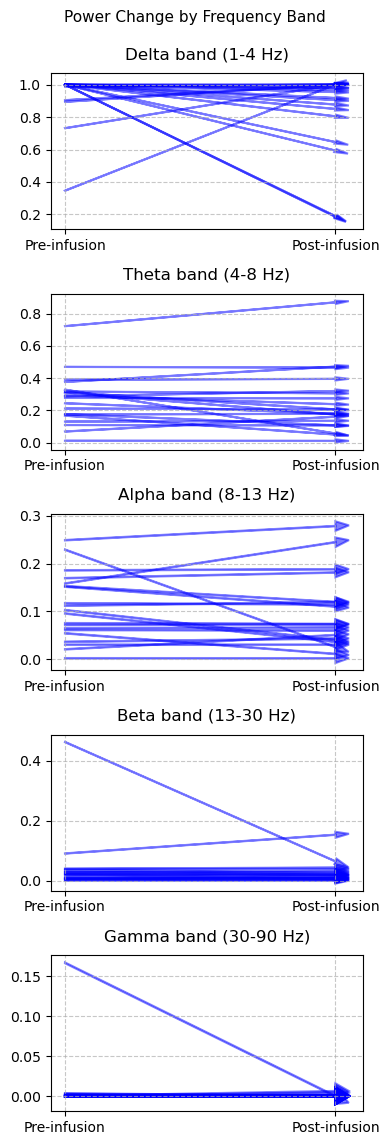

In [ ]:
# Figure 1 작성 코드

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
data = df_scaled.iloc[:, [1, 4, 5]]

# Define frequency ranges for each band
band_ranges = {
    'delta': '(1-4 Hz)',
    'theta': '(4-8 Hz)',
    'alpha': '(8-13 Hz)',
    'beta': '(13-30 Hz)',
    'gamma': '(30-90 Hz)'
}

# Create the figure with adjusted width
fig, axs = plt.subplots(5, 1, figsize=(4, 12))  # Width reduced
plt.subplots_adjust(hspace=0.4)

# Plot for each band
for i, band in enumerate(band_ranges.keys()):
    band_data = data[data['band'] == band]
    
    # Create arrow plot
    for _, row in band_data.iterrows():
        axs[i].arrow(0, row['mean_pre_infusion_scaled'], 
                     1, row['mean_post_infusion_scaled'] - row['mean_pre_infusion_scaled'], 
                     head_width=0.02, head_length=0.05, 
                     fc='blue', ec='blue', alpha=0.5, linewidth=1.5)
    
    # Customize the plot
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['Pre-infusion', 'Post-infusion'])
    axs[i].set_title(f'{band.capitalize()} band {band_ranges[band]}', pad=10)
    axs[i].grid(True, linestyle='--', alpha=0.7)
    

# Add overall title
fig.suptitle('Power Change by Frequency Band\n\n\n', 
             fontsize=11, 
             y=0.95)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save the plot
plt.savefig(r"E:\주성\documents\2025\Mg comma\parallel_plots.png", dpi=300, bbox_inches='tight')

plt.show()


In [146]:
import pandas as pd
import numpy as np

# CSV 파일 읽기
df6 = df3.iloc[:, :4]

# 스케일링할 컬럼들
columns_to_scale = ['mean_pre_infusion', 'mean_post_infusion']

# 결과를 저장할 새로운 데이터프레임 생성
df_scaled = df6.copy()

# 각 name별로 min-max scaling 수행
for name in df['name'].unique():
    # 현재 name에 해당하는 데이터 마스크
    mask = df['name'] == name
    
    # pre와 post 값을 모두 포함하는 배열 생성
    all_values = np.concatenate([
        df.loc[mask, 'mean_pre_infusion'].values,
        df.loc[mask, 'mean_post_infusion'].values
    ])
    
    # 전체 값에서 min, max 계산
    min_val = np.min(all_values)
    max_val = np.max(all_values)
    
    # pre와 post 각각에 대해 동일한 min, max 값으로 스케일링
    df_scaled.loc[mask, 'mean_pre_infusion_scaled'] = (df.loc[mask, 'mean_pre_infusion'] - min_val) / (max_val - min_val)
    df_scaled.loc[mask, 'mean_post_infusion_scaled'] = (df.loc[mask, 'mean_post_infusion'] - min_val) / (max_val - min_val)

# 결과 확인
print("Original data for first few rows:")
print(df[['name', 'mean_pre_infusion', 'mean_post_infusion']].head())
print("\nScaled data for first few rows:")
print(df_scaled[['name', 'mean_pre_infusion_scaled', 'mean_post_infusion_scaled']].head())

# 각 name별 스케일링된 값의 범위 확인
for name in df['name'].unique():
    mask = df_scaled['name'] == name
    print(f"\nScaling ranges for {name}:")
    all_scaled_values = np.concatenate([
        df_scaled.loc[mask, 'mean_pre_infusion_scaled'].values,
        df_scaled.loc[mask, 'mean_post_infusion_scaled'].values
    ])
    print(f"Min: {np.min(all_scaled_values):.3f}")
    print(f"Max: {np.max(all_scaled_values):.3f}")

Original data for first few rows:
  name  mean_pre_infusion  mean_post_infusion
0  고정실       1.703294e-08        3.241658e-09
1  고정실       5.616056e-09        9.920564e-10
2  고정실       9.354715e-10        1.989846e-10
3  고정실       1.141392e-10        6.668991e-11
4  고정실       1.616524e-11        2.009946e-11

Scaled data for first few rows:
  name  mean_pre_infusion_scaled  mean_post_infusion_scaled
0  고정실                  1.000000                   0.189548
1  고정실                  0.329081                   0.057349
2  고정실                  0.054024                   0.010743
3  고정실                  0.005757                   0.002969
4  고정실                  0.000000                   0.000231

Scaling ranges for 고정실:
Min: 0.000
Max: 1.000

Scaling ranges for 김가람:
Min: 0.000
Max: 1.000

Scaling ranges for 김득실:
Min: 0.000
Max: 1.000

Scaling ranges for 김영현:
Min: 0.000
Max: 1.000

Scaling ranges for 김정한:
Min: 0.000
Max: 1.000

Scaling ranges for 김충연:
Min: 0.000
Max: 1.000

Scaling ranges

In [147]:
df_scaled

,name,band,mean_pre_infusion,mean_post_infusion,mean_pre_infusion_scaled,mean_post_infusion_scaled
0,고정실,delta,1.703294e-08,3.241658e-09,1.000000,0.189548
1,고정실,theta,5.616056e-09,9.920564e-10,0.329081,0.057349
2,고정실,alpha,9.354715e-10,1.989846e-10,0.054024,0.010743
3,고정실,beta,1.141392e-10,6.668991e-11,0.005757,0.002969
4,고정실,gamma,1.616524e-11,2.009946e-11,0.000000,0.000231
...,...,...,...,...,...,...
95,조진욱,delta,1.463215e-08,2.716271e-09,1.000000,0.185325
96,조진욱,theta,2.460651e-09,7.497018e-10,0.167848,0.050872
97,조진욱,alpha,1.402035e-09,5.321387e-10,0.095472,0.035998
98,조진욱,beta,3.255450e-10,9.888629e-11,0.021873,0.006377


In [ ]:
import pandas as pd

df = pd.read_csv(r"E:\주성\documents\2025\Mg comma\data2.csv")

In [3]:
df

,Unnamed: 0,name,band,mean_pre_infusion,mean_post_infusion
0,0,고정실,delta,1.703294e-08,3.241658e-09
1,1,고정실,theta,5.616056e-09,9.920564e-10
2,2,고정실,alpha,9.354715e-10,1.989846e-10
3,3,고정실,beta,1.141392e-10,6.668991e-11
4,4,고정실,gamma,1.616524e-11,2.009946e-11
...,...,...,...,...,...
95,95,조진욱,delta,1.463215e-08,2.716271e-09
96,96,조진욱,theta,2.460651e-09,7.497018e-10
97,97,조진욱,alpha,1.402035e-09,5.321387e-10
98,98,조진욱,beta,3.255450e-10,9.888629e-11


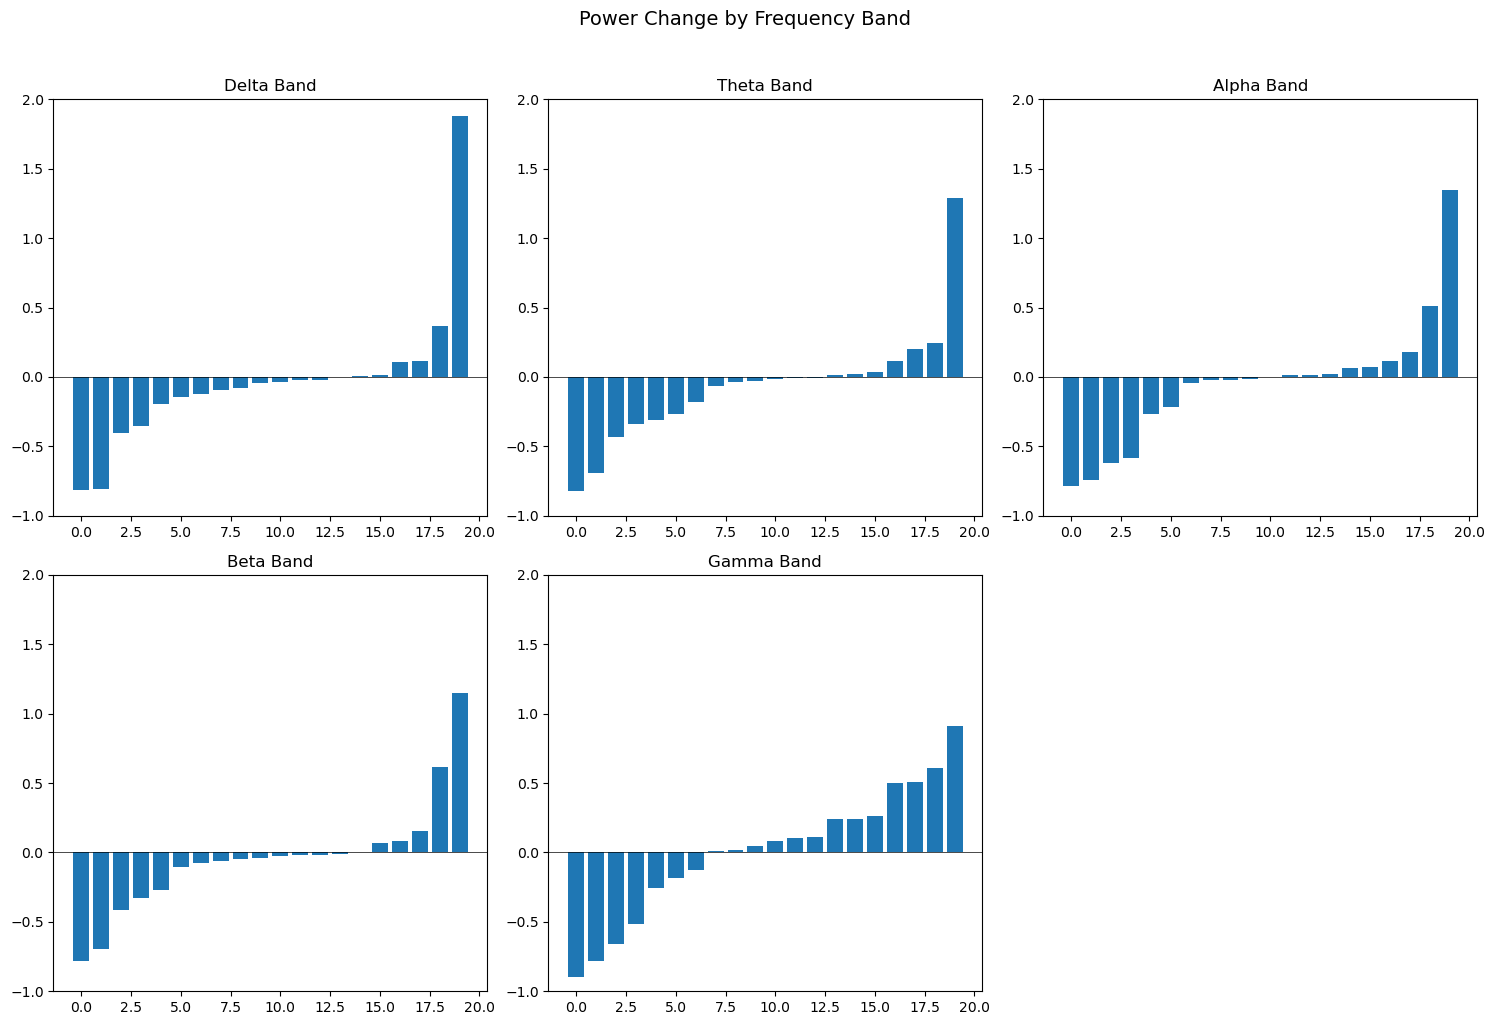

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
data = df

# 밴드별로 데이터 나누기
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

plt.figure(figsize=(15, 10))
for idx, band in enumerate(bands, 1):
    plt.subplot(2, 3, idx)
    
    # 해당 밴드의 데이터만 추출
    band_data = data[data['band'] == band].copy()
    
    # 변화율 계산 ((post - pre) / pre)
    change = (band_data['mean_post_infusion'] - band_data['mean_pre_infusion']) / band_data['mean_pre_infusion']
    
    # 오름차순 정렬
    sorted_change = np.sort(change)
    
    # 바 차트 그리기
    plt.bar(range(len(sorted_change)), sorted_change)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    plt.title(f'{band.capitalize()} Band')
    plt.ylim(-1, 2)  # y축 범위 수정

plt.suptitle('Power Change by Frequency Band', fontsize=14, y=1.02)    
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv(r"D:\주성\documents\2025\Mg comma\data2.csv", index_col=0)

In [19]:
df.tail(20)

,name,band,mean_pre_infusion,mean_post_infusion,diff
80,정금례,gamma,3.014131e-10,3.156471e-10,1.423395e-11
81,정금례,beta,1.128072e-09,2.427636e-09,1.299565e-09
82,정금례,alpha,3.731420e-09,8.748418e-09,5.016998e-09
83,정금례,theta,1.194352e-08,2.731766e-08,1.537414e-08
84,정금례,delta,5.831191e-08,1.678118e-07,1.094999e-07
85,정복연,delta,9.088149e-09,1.016353e-08,1.075377e-09
86,정복연,gamma,4.307430e-11,1.481975e-11,-2.825455e-11
87,정복연,beta,2.504298e-10,2.248393e-10,-2.559051e-11
88,정복연,alpha,1.149041e-09,1.227569e-09,7.852783e-11
89,정복연,theta,3.977821e-09,4.030796e-09,5.297496e-11


In [5]:
df['diff'] = df['mean_post_infusion'] - df['mean_pre_infusion']

In [29]:
df['diff_ratio'] = df['diff'] / df['mean_pre_infusion']

In [33]:
from scipy.stats import shapiro

for band in df['band'].unique():
    df_band = df.loc[df['band']==band]
    shape = df_band.shape
    p_pre = shapiro(df_band['mean_pre_infusion']).pvalue > 0.05
    p_post = shapiro(df_band['mean_post_infusion']).pvalue > 0.05
    p_diff = shapiro(df_band['diff']).pvalue > 0.05
    p_diff_ratio = shapiro(df_band['diff_ratio']).pvalue > 0.05
    print(band, shape, "pre", p_pre, "post", p_post, "diff", p_diff, "diff_ratio", p_diff_ratio)

delta (20, 6) pre False post False diff False diff_ratio False
theta (20, 6) pre False post False diff False diff_ratio False
alpha (20, 6) pre False post False diff False diff_ratio False
beta (20, 6) pre False post False diff False diff_ratio False
gamma (20, 6) pre False post False diff False diff_ratio True


In [12]:
from scipy.stats import kstest, norm

s, p = kstest(df['diff'], 'norm', args=(df['diff'].mean(), df['diff'].std()))
print(p)

5.0965604586137426e-18


In [34]:
from scipy.stats import kstest, norm

s, p = kstest(df['diff_ratio'], 'norm', args=(df['diff_ratio'].mean(), df['diff_ratio'].std()))
print(p)

0.0015308553679989068


In [24]:
pre = {}
post = {}
for band in df['band'].unique():
    pre[band] = df.loc[df['band'] == band, 'mean_pre_infusion']
    post[band] = df.loc[df['band'] == band, 'mean_post_infusion']

In [25]:
from scipy.stats import friedmanchisquare as freid
s_pre, p_pre = freid(
    pre['delta'], pre['theta'], pre['alpha'], pre['beta'], pre['gamma']
)
s_post, p_post = freid(
    post['delta'], post['theta'], post['alpha'], post['beta'], post['gamma']
)

print(s_pre, p_pre, s_post, p_post)

76.96000000000004 7.668765897280855e-16 78.56 3.5156223172639525e-16


In [28]:
from scipy.stats import wilcoxon
# Pre condition에서의 주파수 대역 쌍 비교
print("Pre condition post-hoc analysis:")
pairs = [
   ('delta', 'theta'),
   ('delta', 'alpha'),
   ('delta', 'beta'),
   ('delta', 'gamma'),
   ('theta', 'alpha'),
   ('theta', 'beta'),
   ('theta', 'gamma'),
   ('alpha', 'beta'),
   ('alpha', 'gamma'),
   ('beta', 'gamma')
]

# Pre condition post-hoc
print("Pre condition post-hoc analysis:")
for band1, band2 in pairs:
   stat, p = wilcoxon(pre[band1], pre[band2])
   print(f"{band1} vs {band2}: stat={stat:.3f}, p={p:.6f}")

print("\nPost condition post-hoc analysis:")
for band1, band2 in pairs:
   stat, p = wilcoxon(post[band1], post[band2])
   print(f"{band1} vs {band2}: stat={stat:.3f}, p={p:.6f}")

# Bonferroni corrected alpha = 0.05/10 = 0.005

Pre condition post-hoc analysis:
Pre condition post-hoc analysis:
delta vs theta: stat=0.000, p=0.000002
delta vs alpha: stat=0.000, p=0.000002
delta vs beta: stat=0.000, p=0.000002
delta vs gamma: stat=0.000, p=0.000002
theta vs alpha: stat=4.000, p=0.000013
theta vs beta: stat=12.000, p=0.000134
theta vs gamma: stat=0.000, p=0.000002
alpha vs beta: stat=18.000, p=0.000483
alpha vs gamma: stat=0.000, p=0.000002
beta vs gamma: stat=0.000, p=0.000002

Post condition post-hoc analysis:
delta vs theta: stat=0.000, p=0.000002
delta vs alpha: stat=0.000, p=0.000002
delta vs beta: stat=0.000, p=0.000002
delta vs gamma: stat=0.000, p=0.000002
theta vs alpha: stat=0.000, p=0.000002
theta vs beta: stat=0.000, p=0.000002
theta vs gamma: stat=0.000, p=0.000002
alpha vs beta: stat=11.000, p=0.000105
alpha vs gamma: stat=0.000, p=0.000002
beta vs gamma: stat=0.000, p=0.000002


In [38]:
for band in df['band'].unique():
    df_band = df.loc[df['band']==band]
    s, p = wilcoxon(df_band['diff_ratio'])
    print(band, p)

delta 0.11398696899414062
theta 0.21616744995117188
alpha 0.6215133666992188
beta 0.21616744995117188
gamma 0.7285060882568359


In [1]:
import pandas as pd

df = pd.read_excel(r"D:\주성\documents\2025\Mg comma\clinical features2.xlsx", sheet_name = 'Table1')

In [2]:
df

,Patient No.,Sex,Age,Premorbid mRS Score,STESS,SRSE,NORSE,Sz Type,Etiology,Number of AED,Immunotherapy Medications,CIVAD Medications,Mg Protocol
0,1,F,51,0,4,Yes,No,NCSE,Metabolic,13,S,MKPb,B
1,2,F,25,0,3,Yes,Yes,NCSE,Autoimmune,15,SIRT,MK,B
2,3,F,79,5,6,No,No,NCSE,Remote vascular disease,3,NaN,NaN,A
3,4,M,46,0,3,Yes,Yes,NCSE,Autoimmune,4,SI,M,A
4,5,F,84,3,6,Yes,Yes,NCSE,Autoimmune,12,SIR,M,A
5,6,M,71,0,6,No,Yes,NCSE,Autoimmune,3,S,NaN,A
6,7,M,79,3,5,No,Yes,NCSE,Cryptogenic,8,SI,NaN,B
7,8,F,40,0,0,Yes,No,Focal SE,Cryptogenic,11,NaN,M,B
8,9,M,21,0,3,Yes,Yes,GCSE,Cryptogenic,9,S,MPbKPr,A
9,10,M,57,2,4,Yes,Yes,NCSE,Cryptogenic,4,NaN,M,A


In [3]:
mg = pd.read_csv(r"D:\주성\documents\2025\Mg comma\data2.csv")

In [4]:
mg2 = mg.loc[mg['band'].isin(['delta', 'theta'])]
mg2['diff'] = (mg2['mean_pre_infusion'] - mg2['mean_post_infusion'])>=0

response = mg2.groupby('name')['diff'].sum()==2

C:\Users\Brain_Science\AppData\Local\Temp\ipykernel_28644\1525054481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mg2['diff'] = (mg2['mean_pre_infusion'] - mg2['mean_post_infusion'])>=0


In [5]:
response = response.reset_index(drop=True)

In [6]:
df['response'] = response

In [7]:
df

,Patient No.,Sex,Age,Premorbid mRS Score,STESS,SRSE,NORSE,Sz Type,Etiology,Number of AED,Immunotherapy Medications,CIVAD Medications,Mg Protocol,response
0,1,F,51,0,4,Yes,No,NCSE,Metabolic,13,S,MKPb,B,True
1,2,F,25,0,3,Yes,Yes,NCSE,Autoimmune,15,SIRT,MK,B,True
2,3,F,79,5,6,No,No,NCSE,Remote vascular disease,3,NaN,NaN,A,False
3,4,M,46,0,3,Yes,Yes,NCSE,Autoimmune,4,SI,M,A,False
4,5,F,84,3,6,Yes,Yes,NCSE,Autoimmune,12,SIR,M,A,True
5,6,M,71,0,6,No,Yes,NCSE,Autoimmune,3,S,NaN,A,True
6,7,M,79,3,5,No,Yes,NCSE,Cryptogenic,8,SI,NaN,B,False
7,8,F,40,0,0,Yes,No,Focal SE,Cryptogenic,11,NaN,M,B,False
8,9,M,21,0,3,Yes,Yes,GCSE,Cryptogenic,9,S,MPbKPr,A,True
9,10,M,57,2,4,Yes,Yes,NCSE,Cryptogenic,4,NaN,M,A,True


In [32]:
df['STESS_3'] = df['STESS'] >= 3

In [33]:
cross = pd.crosstab(df['STESS_3'], df['response'])


import scipy.stats as stats
s, p, d, f = stats.chi2_contingency(cross)

print (cross, '\n', s, p)

response  False  True 
STESS_3               
False         1      4
True          6      9 
 0.07326007326007326 0.7866479436710674


In [9]:
df['ketamine'] = df['CIVAD Medications'].str.contains('K')

In [12]:
df1 = df[['ketamine', 'response']].dropna()
cross = pd.crosstab(df1['ketamine'], df1['response'])
from scipy.stats import chi2_contingency
s, p, d, f = chi2_contingency(cross)
print(cross, '\n', s, p)

response  False  True 
ketamine              
False         2      5
True          1      5 
 0.0 1.0


In [15]:
df = pd.read_excel(r"D:\주성\documents\2025\Mg comma\clinical features2.xlsx", sheet_name='Table2')

In [16]:
df

,Patient No.,Mg Protocol Type,Mg Starting Date,Mg Infusion Day,Loading Mg,Maintenance Mg,Total Mg,Max concentration
0,1,2,10,4,4.0,2.000000,195.3,8.6
1,2,2,61,9,4.0,2.000000,452.7,9.3
2,3,1,2,1,4.0,0.666667,20.0,4.2
3,4,1,8,0,4.0,2.000000,18.0,4.2
4,5,1,1,1,4.0,0.666667,20.0,4.3
5,6,1,2,1,4.0,0.666667,20.0,4.3
6,7,2,34,2,3.5,2.000000,89.4,7.1
7,8,2,17,5,2.0,2.000000,254.7,7.2
8,9,1,1,1,4.0,0.666667,20.0,3.9
9,10,1,1,1,4.0,0.666667,20.0,5.4


In [17]:
A = df.loc[df['Mg Protocol Type']==1]

In [18]:
A.describe()

,Patient No.,Mg Protocol Type,Mg Starting Date,Mg Infusion Day,Loading Mg,Maintenance Mg,Total Mg,Max concentration
count,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.000000,14.000000
mean,11.785714,1.0,3.214286,0.928571,4.0,0.761905,19.857143,4.800000
std,5.833307,0.0,2.805998,0.267261,0.0,0.356348,0.534522,1.059027
min,3.000000,1.0,1.000000,0.000000,4.0,0.666667,18.000000,3.900000
25%,6.750000,1.0,1.000000,1.000000,4.0,0.666667,20.000000,4.200000
50%,11.500000,1.0,2.000000,1.000000,4.0,0.666667,20.000000,4.300000
75%,16.750000,1.0,5.250000,1.000000,4.0,0.666667,20.000000,5.250000
max,20.000000,1.0,9.000000,1.000000,4.0,2.000000,20.000000,7.600000


In [19]:
B = df.loc[df['Mg Protocol Type']==2]
B.describe()

,Patient No.,Mg Protocol Type,Mg Starting Date,Mg Infusion Day,Loading Mg,Maintenance Mg,Total Mg,Max concentration
count,6.000000,6.0,6.000000,6.000000,6.000000,6.0,6.000000,6.000000
mean,7.500000,2.0,26.833333,6.000000,3.583333,2.0,293.700000,8.500000
std,5.394442,0.0,20.351085,5.215362,0.801041,0.0,252.650644,1.089954
min,1.000000,2.0,6.000000,1.000000,2.000000,2.0,50.200000,7.100000
25%,3.250000,2.0,11.750000,2.500000,3.625000,2.0,115.875000,7.550000
50%,7.500000,2.0,25.000000,4.500000,4.000000,2.0,225.000000,8.950000
75%,11.750000,2.0,33.750000,8.000000,4.000000,2.0,403.200000,9.300000
max,14.000000,2.0,61.000000,15.000000,4.000000,2.0,719.900000,9.500000


In [20]:
from scipy.stats import mannwhitneyu as mann

s, p = mann(A['Total Mg'], B['Total Mg'])
print(s, p)



0.0 5.9117735026457264e-05


In [21]:
s, p = mann(A['Max concentration'], B['Max concentration'])
print(s, p)

2.0 0.001084069477128459


In [22]:
df2 = pd.read_excel(r"D:\주성\documents\2025\Mg comma\clinical features2.xlsx", sheet_name='Table1')

In [23]:
df2

,Patient No.,Sex,Age,Premorbid mRS Score,STESS,SRSE,NORSE,Sz Type,Etiology,Number of AED,Immunotherapy Medications,CIVAD Medications,Mg Protocol
0,1,F,51,0,4,Yes,No,NCSE,Metabolic,13,S,MKPb,B
1,2,F,25,0,3,Yes,Yes,NCSE,Autoimmune,15,SIRT,MK,B
2,3,F,79,5,6,No,No,NCSE,Remote vascular disease,3,NaN,NaN,A
3,4,M,46,0,3,Yes,Yes,NCSE,Autoimmune,4,SI,M,A
4,5,F,84,3,6,Yes,Yes,NCSE,Autoimmune,12,SIR,M,A
5,6,M,71,0,6,No,Yes,NCSE,Autoimmune,3,S,NaN,A
6,7,M,79,3,5,No,Yes,NCSE,Cryptogenic,8,SI,NaN,B
7,8,F,40,0,0,Yes,No,Focal SE,Cryptogenic,11,NaN,M,B
8,9,M,21,0,3,Yes,Yes,GCSE,Cryptogenic,9,S,MPbKPr,A
9,10,M,57,2,4,Yes,Yes,NCSE,Cryptogenic,4,NaN,M,A


In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Brain_Science\Desktop\Power_Change_Rates.csv')

In [3]:
df

,ID,band,pre,post,day1,day3,post_change,day1_change,day3_change
0,1,delta,1.703294e-08,3.241658e-09,1.104101e-09,7.117405e-09,-0.809683,-0.935178,-0.582139
1,1,theta,5.616056e-09,9.920564e-10,3.363198e-10,2.893872e-09,-0.823354,-0.940115,-0.484714
2,1,alpha,9.354715e-10,1.989846e-10,7.408740e-11,5.014416e-10,-0.787290,-0.920802,-0.463969
3,1,beta,1.141392e-10,6.668991e-11,4.376688e-11,5.100720e-11,-0.415714,-0.616548,-0.553114
4,1,gamma,1.616524e-11,2.009946e-11,4.998345e-12,8.582071e-12,0.243375,-0.690797,-0.469104
...,...,...,...,...,...,...,...,...,...
95,20,delta,1.463215e-08,2.716271e-09,2.774729e-09,3.757266e-09,-0.814363,-0.810368,-0.743218
96,20,theta,2.460651e-09,7.497018e-10,4.547233e-10,8.098603e-10,-0.695324,-0.815202,-0.670876
97,20,alpha,1.402035e-09,5.321387e-10,3.249860e-10,3.985718e-10,-0.620453,-0.768204,-0.715719
98,20,beta,3.255450e-10,9.888629e-11,7.266105e-11,6.021111e-11,-0.696244,-0.776802,-0.815045


In [8]:
df['ID'].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 13, 14, 15, 17, 19, 12, 18,
        5, 16, 20])

In [41]:
result_post = {}
for ID in df['ID'].unique():
    # 해당 ID에 대해 delta와 theta 밴드만 필터링
    df_filter = df.loc[(df['ID'] == ID) & (df['band'].isin(['delta', 'theta']))]
    
    # 각 밴드의 post_change 값이 모두 0보다 작은지 확인 (조건에 따라 all()이나 원하는 집계함수를 사용)
    delta_condition = (df_filter.loc[df_filter['band'] == 'delta', 'post_change'] < 0).all()
    theta_condition = (df_filter.loc[df_filter['band'] == 'theta', 'post_change'] < 0).all()
    
    # 두 조건 모두 만족하면 response True, 아니면 False
    response = delta_condition and theta_condition
    
    # 현재 ID를 키로 사용하여 결과 저장
    result_post[ID] = response

result_post = pd.Series(result_post).sort_index().reset_index(drop=True)

In [42]:
import numpy as np
result_day1 = {}
for ID in df['ID'].unique():
    # 해당 ID에 대해 delta와 theta 밴드만 필터링
    df_filter = df.loc[(df['ID'] == ID) & (df['band'].isin(['delta', 'theta']))]
    
    if df_filter.loc[df_filter['band'] == 'delta', 'day1_change'].isna().any() == False:
        # 각 밴드의 post_change 값이 모두 0보다 작은지 확인 (조건에 따라 all()이나 원하는 집계함수를 사용)
        delta_condition = (df_filter.loc[df_filter['band'] == 'delta', 'day1_change'] < 0).all()
        theta_condition = (df_filter.loc[df_filter['band'] == 'theta', 'day1_change'] < 0).all()
    
        # 두 조건 모두 만족하면 response True, 아니면 False
        response = delta_condition and theta_condition
    else:
        response = np.nan
    
    # 현재 ID를 키로 사용하여 결과 저장
    result_day1[ID] = response

result_day1 = pd.Series(result_day1).sort_index().reset_index(drop=True)

In [17]:
outcome = pd.read_excel(r"D:\주성\documents\2025\Mg comma\clinical features4.xlsx", sheet_name='Table5')

In [43]:
outcome['post'] = result_post
outcome['day1'] = result_day1

In [50]:
outcome['mRS_3mo_text'] = pd.to_numeric(outcome['mRS_3mo_text'], errors='coerce')

In [51]:
outcome

,Patient No.,Seizure_days,Hospital_days,Inhospital_Mortality,mRS_Discharge,mRS_3mo_text,post,day1
0,1,19,19,1,6,6.0,True,True
1,2,85,58,1,6,6.0,True,False
2,3,4,8,0,5,NaN,False,False
3,4,11,18,0,3,NaN,False,False
4,5,10,112,0,5,5.0,True,False
5,6,5,14,0,2,2.0,True,True
6,7,119,119,0,5,NaN,False,True
7,8,84,84,0,5,5.0,False,NaN
8,9,36,36,1,6,6.0,True,False
9,10,18,18,1,6,6.0,True,False


In [63]:
outcome.loc[(outcome['post'] == True) & (outcome['day1'] == True)]

,Patient No.,Seizure_days,Hospital_days,Inhospital_Mortality,mRS_Discharge,mRS_3mo_text,post,day1
0,1,19,19,1,6,6.0,True,True
5,6,5,14,0,2,2.0,True,True
11,12,19,74,0,5,5.0,True,True
13,14,82,82,0,5,5.0,True,True
14,15,5,32,0,3,3.0,True,True
18,19,13,30,1,6,6.0,True,True
19,20,15,211,0,5,5.0,True,True


In [58]:
outcome.columns

Index(['Patient No.', 'Seizure_days', 'Hospital_days', 'Inhospital_Mortality',
       'mRS_Discharge', 'mRS_3mo_text', 'post', 'day1'],
      dtype='object')

In [62]:
import scipy.stats as stats
results= {}

outcome2 =  outcome.dropna(subset=['day1'])
for col in outcome2.columns:
    if col in ['mRS_Discharge', 'Seizure_days', 'Hospital_days']:
        group1 = outcome2.loc[outcome2['day1']==True][col]
        group2 = outcome2.loc[outcome2['day1']==False][col]
        s, p = stats.mannwhitneyu(group1, group2)
        results[col] = p
    elif col == 'mRS_3mo_text':
        outcome3 = outcome2.dropna(subset=col)
        group1 = outcome3.loc[outcome3['day1']==True][col]
        group2 = outcome3.loc[outcome3['day1']==False][col]
        s, p = stats.mannwhitneyu(group1, group2)
        results[col] = p        
    else:
        cross = pd.crosstab(outcome2['day1'], outcome2['Inhospital_Mortality'])
        o, p = stats.fisher_exact(cross)
        results[col] = p

pd.Series(results)

Patient No.             0.638009
Seizure_days            0.688668
Hospital_days           0.398372
Inhospital_Mortality    0.638009
mRS_Discharge           0.779332
mRS_3mo_text            0.359874
post                    0.638009
day1                    0.638009
dtype: float64

In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\Brain_Science\Desktop\clinical features4_JYC_수정.xlsx")

In [2]:
df.columns

Index(['Patient No.', 'Sex', 'Age', 'Class_SRSE', 'Class_pSRSE', 'Class_NORSE',
       'Coma', 'CIVAD Medications', 'Coma_Midazolam', 'Coma_Pentobarbital',
       'Coma_Propofol', 'Coma_Ketamine', 'Sz Type', 'Sz_Type_NCSE',
       'Sz_Type_FocalSE', 'Sz_Type_GCSE', 'Etiology', 'Etiology_Class',
       'Etiology_Tumor', 'Etiology_Drug', 'Etiology_Alcohol',
       'Etiology_Infection', 'Etiology_Metabolic', 'Etioloigy_Cryptogenic',
       'Etiology_Acute_vascular', 'Etiology_Autoimmune',
       'Etiolkogy_Remote_vascular', 'STESS', 'mSTESS_total', 'EMSE_4strata',
       'EMSE_6strata', 'ImmunoTx', 'Immunotherapy Medications',
       'ImmunoTx_number', 'ImmunoTx_Steroid', 'ImmunoTx_IVIG',
       'ImmunoTx_Rituximab', 'ImmunoTx_Tocilizumab', 'AED_number',
       'Seizure_days', 'SE_Duration', 'Seizure_not_terminated',
       'Hospital_days', 'mRS_premorbid', 'Inhospital_Mortality',
       'mRS_Discharge', 'mRS_3mo_text', 'Szfree_at3mo', 'Recurred_SE_at3mo',
       'Mg type', 'time_until_Mg

In [3]:
cross = pd.crosstab(df['Inhospital_Mortality'], df['Mg_within_2d_(1: ≦ 2, 2: > 2)'])

import scipy.stats as stats
OR, p_value = stats.fisher_exact(cross)

print(cross)
print(p_value)

Mg_within_2d_(1: ≦ 2, 2: > 2)  1  2
Inhospital_Mortality               
0                              7  7
1                              2  4
0.6424148606811145
